In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('./BankChurners.csv')
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


1. 앙상블에 필요한 컬럼만 남겨놓기

In [3]:
df = df.drop(['CLIENTNUM','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1)

In [4]:
# 결측치는 없음.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op



* 범주형 변수는 인코딩해서 상관관계 확인해보기
* Customer_Age : 카드이용 이탈은 나이에 따라 달라질 것으로 예상됨 -> 나이가 많을수록 변화에 부정적이나 젊을수록 더 나은 조건을 쫓아가는 경향이 있음.
* Gender : 성별에 따른 차이가 있을지 확인 필요
* Dependent_count : 부양해야 하는 사람 수에 따라 달라질 것으로 예상됨 -> 카드별 혜택이 다르므로 가족에 대한 혜택이 적을수록 이탈률이 높아질 것.
* Income_Category : 소득에 따른 차이 또한 영향을 미칠 것 -> 카드 혜택이 소득 수준에 달라지므로 같은 소득구간 내에서 혜택이 적다면 이탈률이 높아질 것.
* Card_Category : 영향을 미칠 것 같으나 소득과 상관성이 있어 생략하기로 결정


In [5]:
df.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [6]:
df['Card_Category'].unique()

array(['Blue', 'Gold', 'Silver', 'Platinum'], dtype=object)

In [7]:
# 순서가 있는 인코딩 : 더 연관있는 항목끼리 가까운 숫자 부여
df['Attrition_Flag']=df['Attrition_Flag'].replace({'Existing Customer':0,'Attrited Customer':1})
df['Gender']=df['Gender'].replace({'M':0,'F':1})
df['Education_Level']=df['Education_Level'].replace({'Uneducated':0,'Unknown':1,'High School':2, 'College':3,'Graduate':4,   
       'Post-Graduate':5, 'Doctorate':6})
df['Marital_Status']=df['Marital_Status'].replace({'Married':0, 'Divorced':1, 'Single':2, 'Unknown':3})
df['Income_Category']=df['Income_Category'].replace({'$60K - $80K':0, 'Less than $40K':1, '$80K - $120K':2, '$40K - $60K':3,
       '$120K +':4, 'Unknown':5})

In [8]:
# Card_Category는 Income_Category와 상관관계가 있을 것으로 예상되어 제외하기로 결정.
df.drop('Card_Category', axis=1, inplace=True)
df

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,0,3,2,0,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,1,5,4,2,1,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,51,0,3,4,0,2,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,40,1,4,2,3,1,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,0,40,0,3,0,0,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0,50,0,2,4,2,3,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,1,41,0,2,1,1,3,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,1,44,1,1,2,0,1,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,1,30,0,2,4,3,3,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


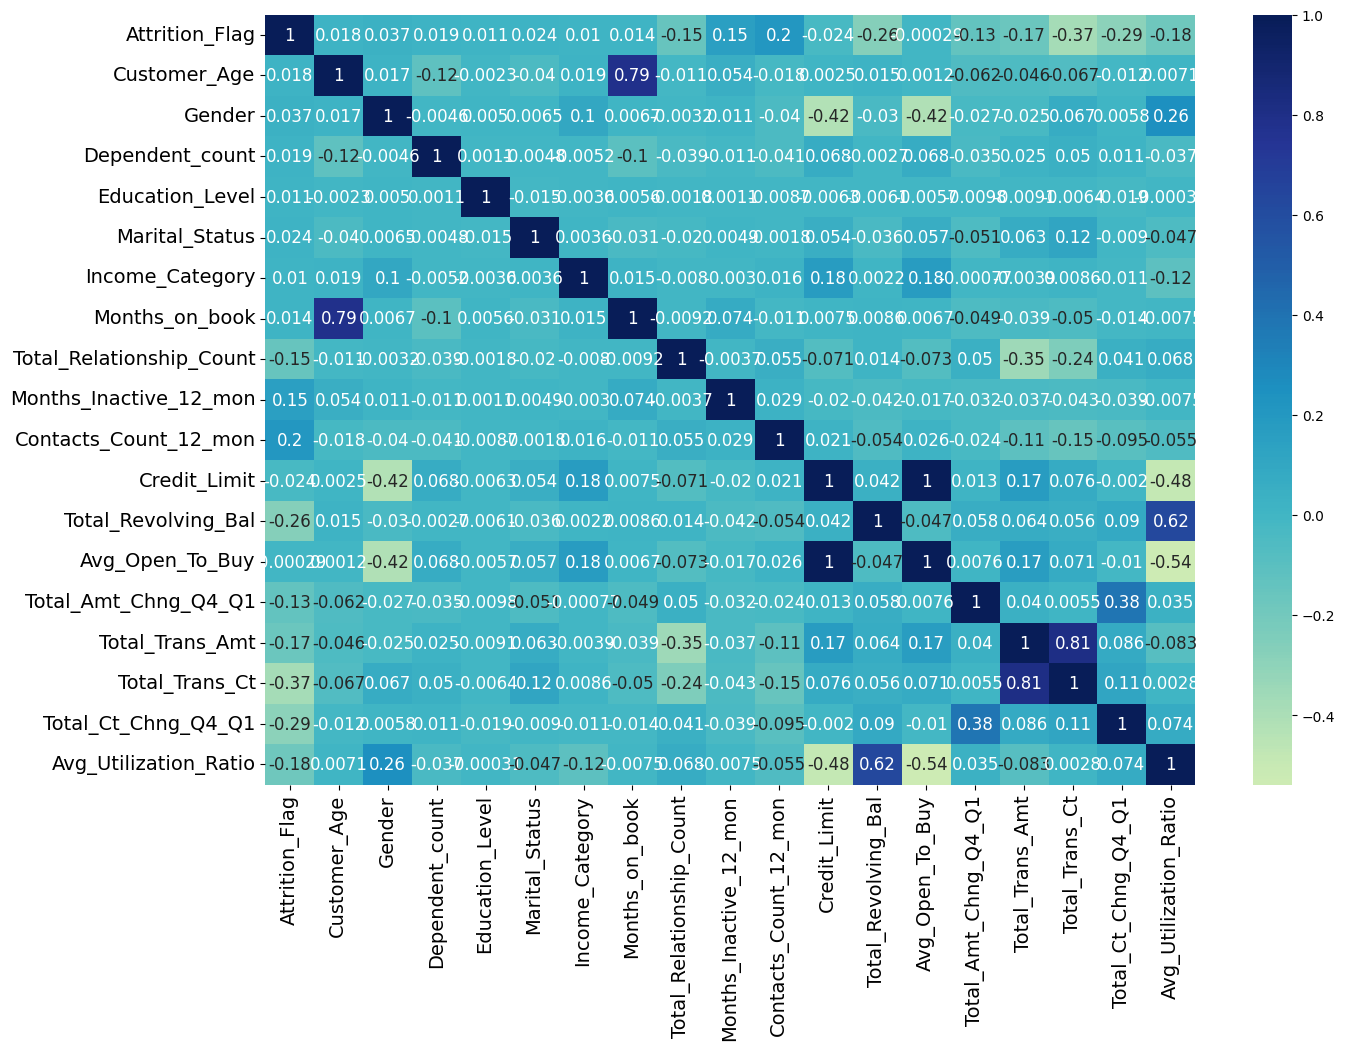

In [64]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.select_dtypes(include=['int', 'float']).corr(), annot=True, center=0,cmap='YlGnBu',annot_kws={'size': 12})
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

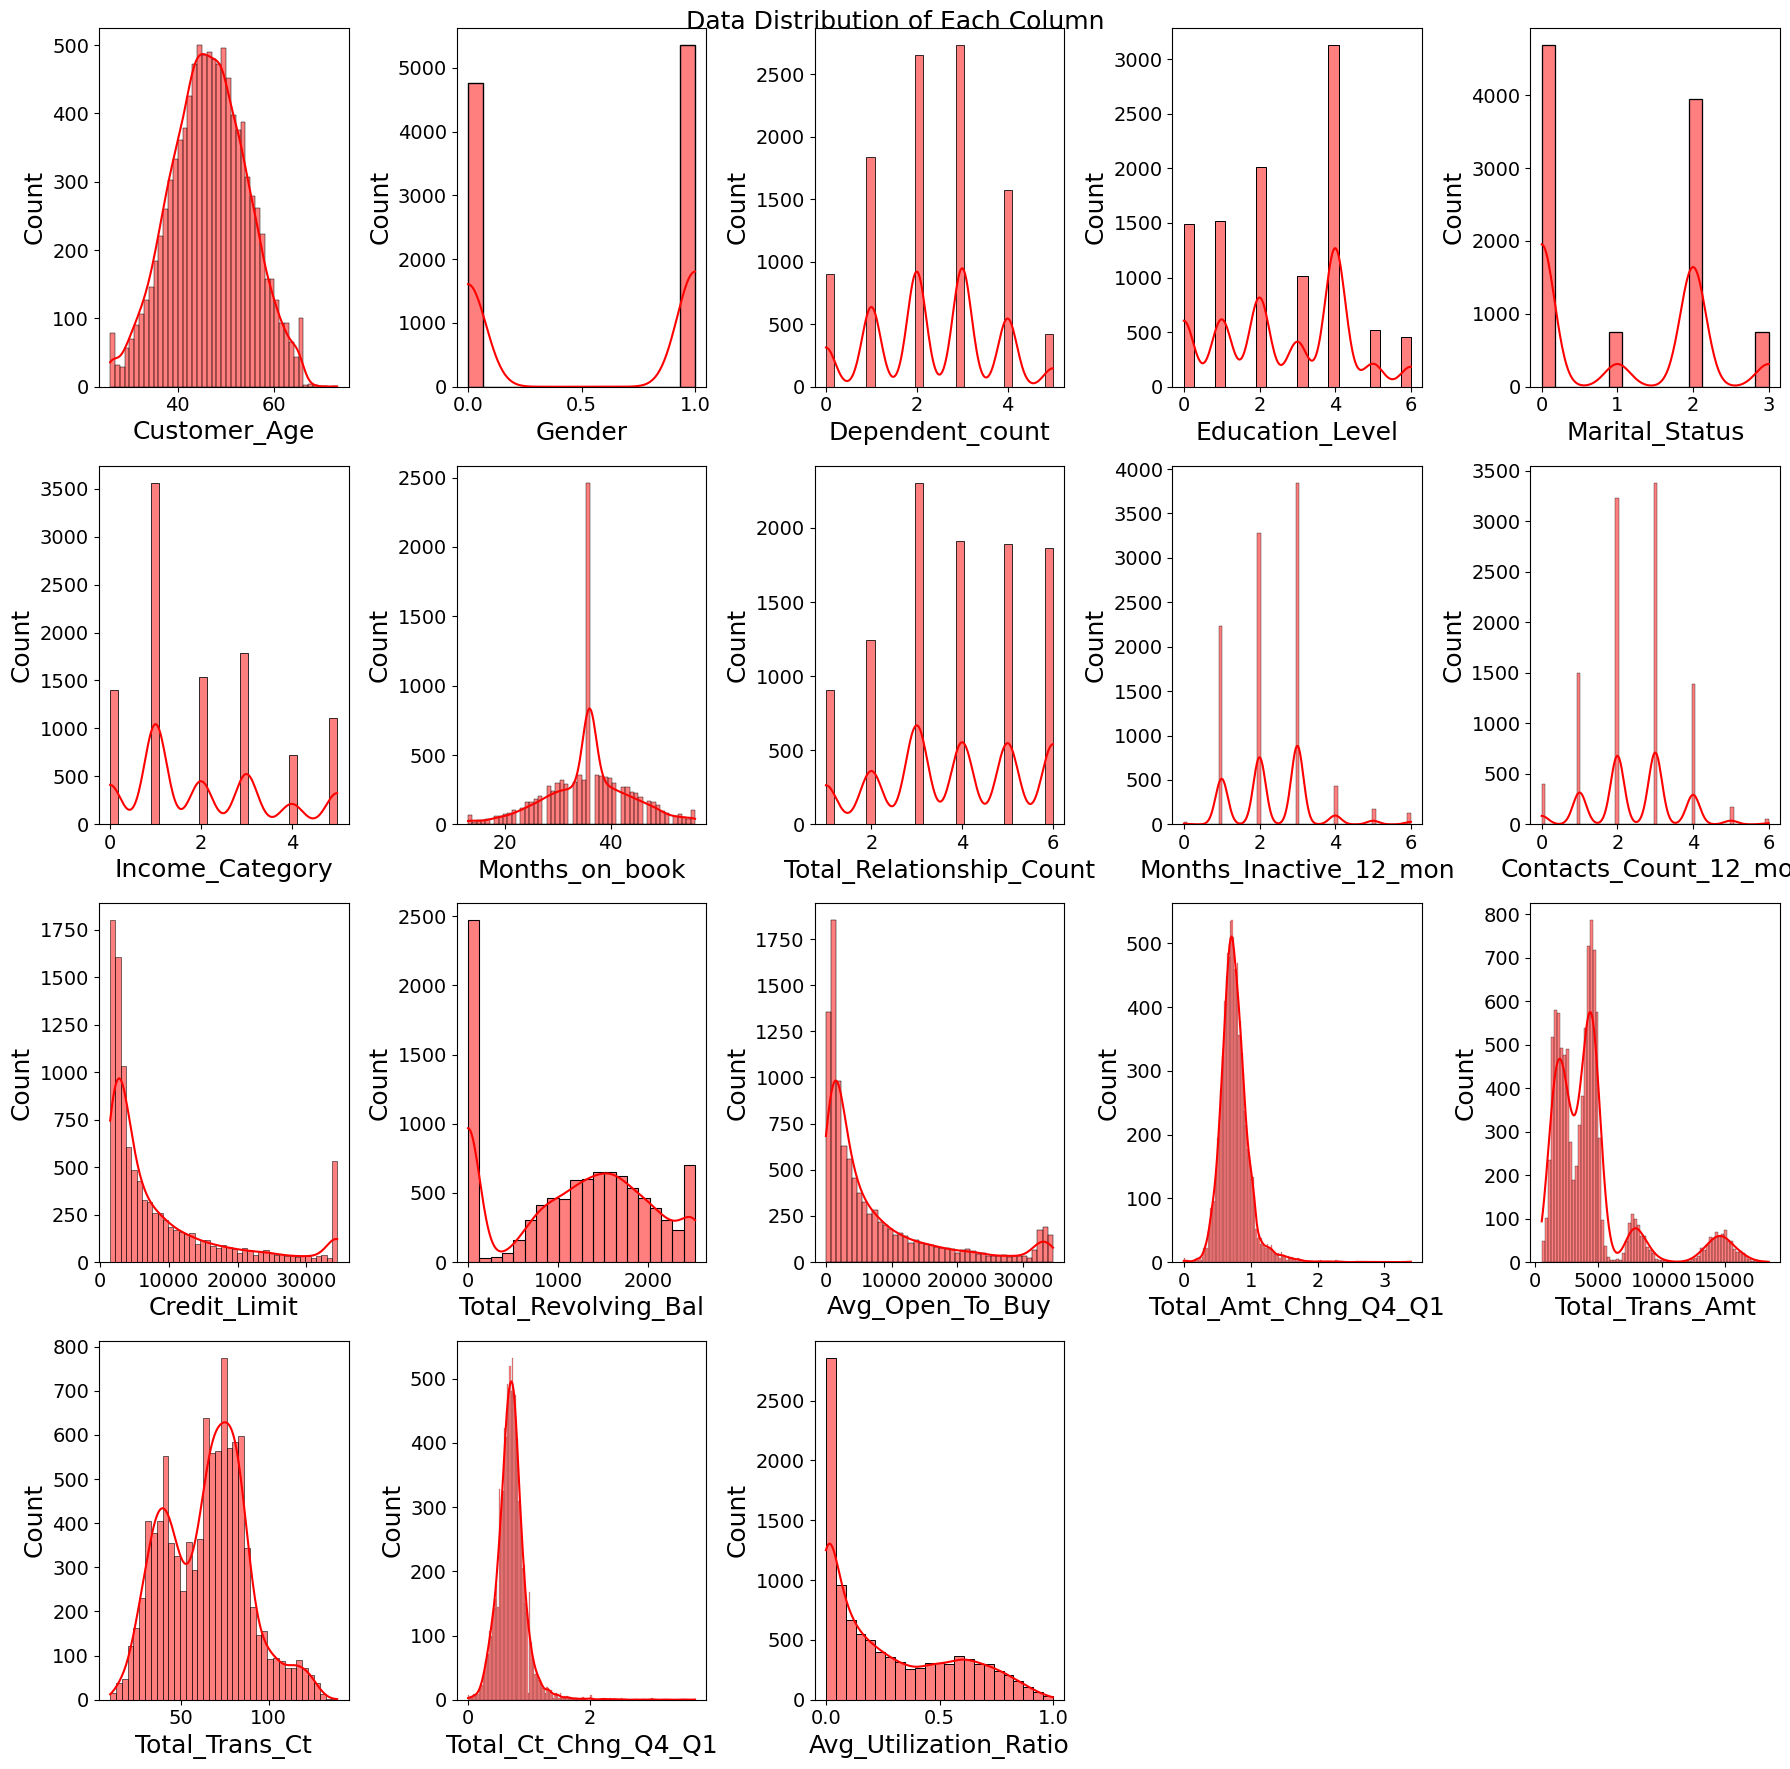

In [18]:
# EDA - 분포 확인하기

plt.figure(figsize=(18, 18))
for i, col in enumerate(df.drop(['Attrition_Flag'], axis=1).select_dtypes(include=['int','float']).columns):
    # 타겟변수인 Attribution_Flag을 제외하고 수치형 변수만 plot

    plt.rcParams['axes.facecolor'] = 'white'
    ax = plt.subplot(4, 5, i+1)  # 각 컬럼에 대해 subplot 생성

     # 각 컬럼에 대해 히스토그램 생성
    sns.histplot(data=df, x=col, ax=ax, color='red', kde=True)

    # KDE 곡선과 함께 생성
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)
    ax.set_xlabel(col, fontsize=18)
    ax.set_ylabel('Count', fontsize=18)
    
plt.suptitle('Data Distribution of Each Column',fontsize=18)
plt.tight_layout()

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

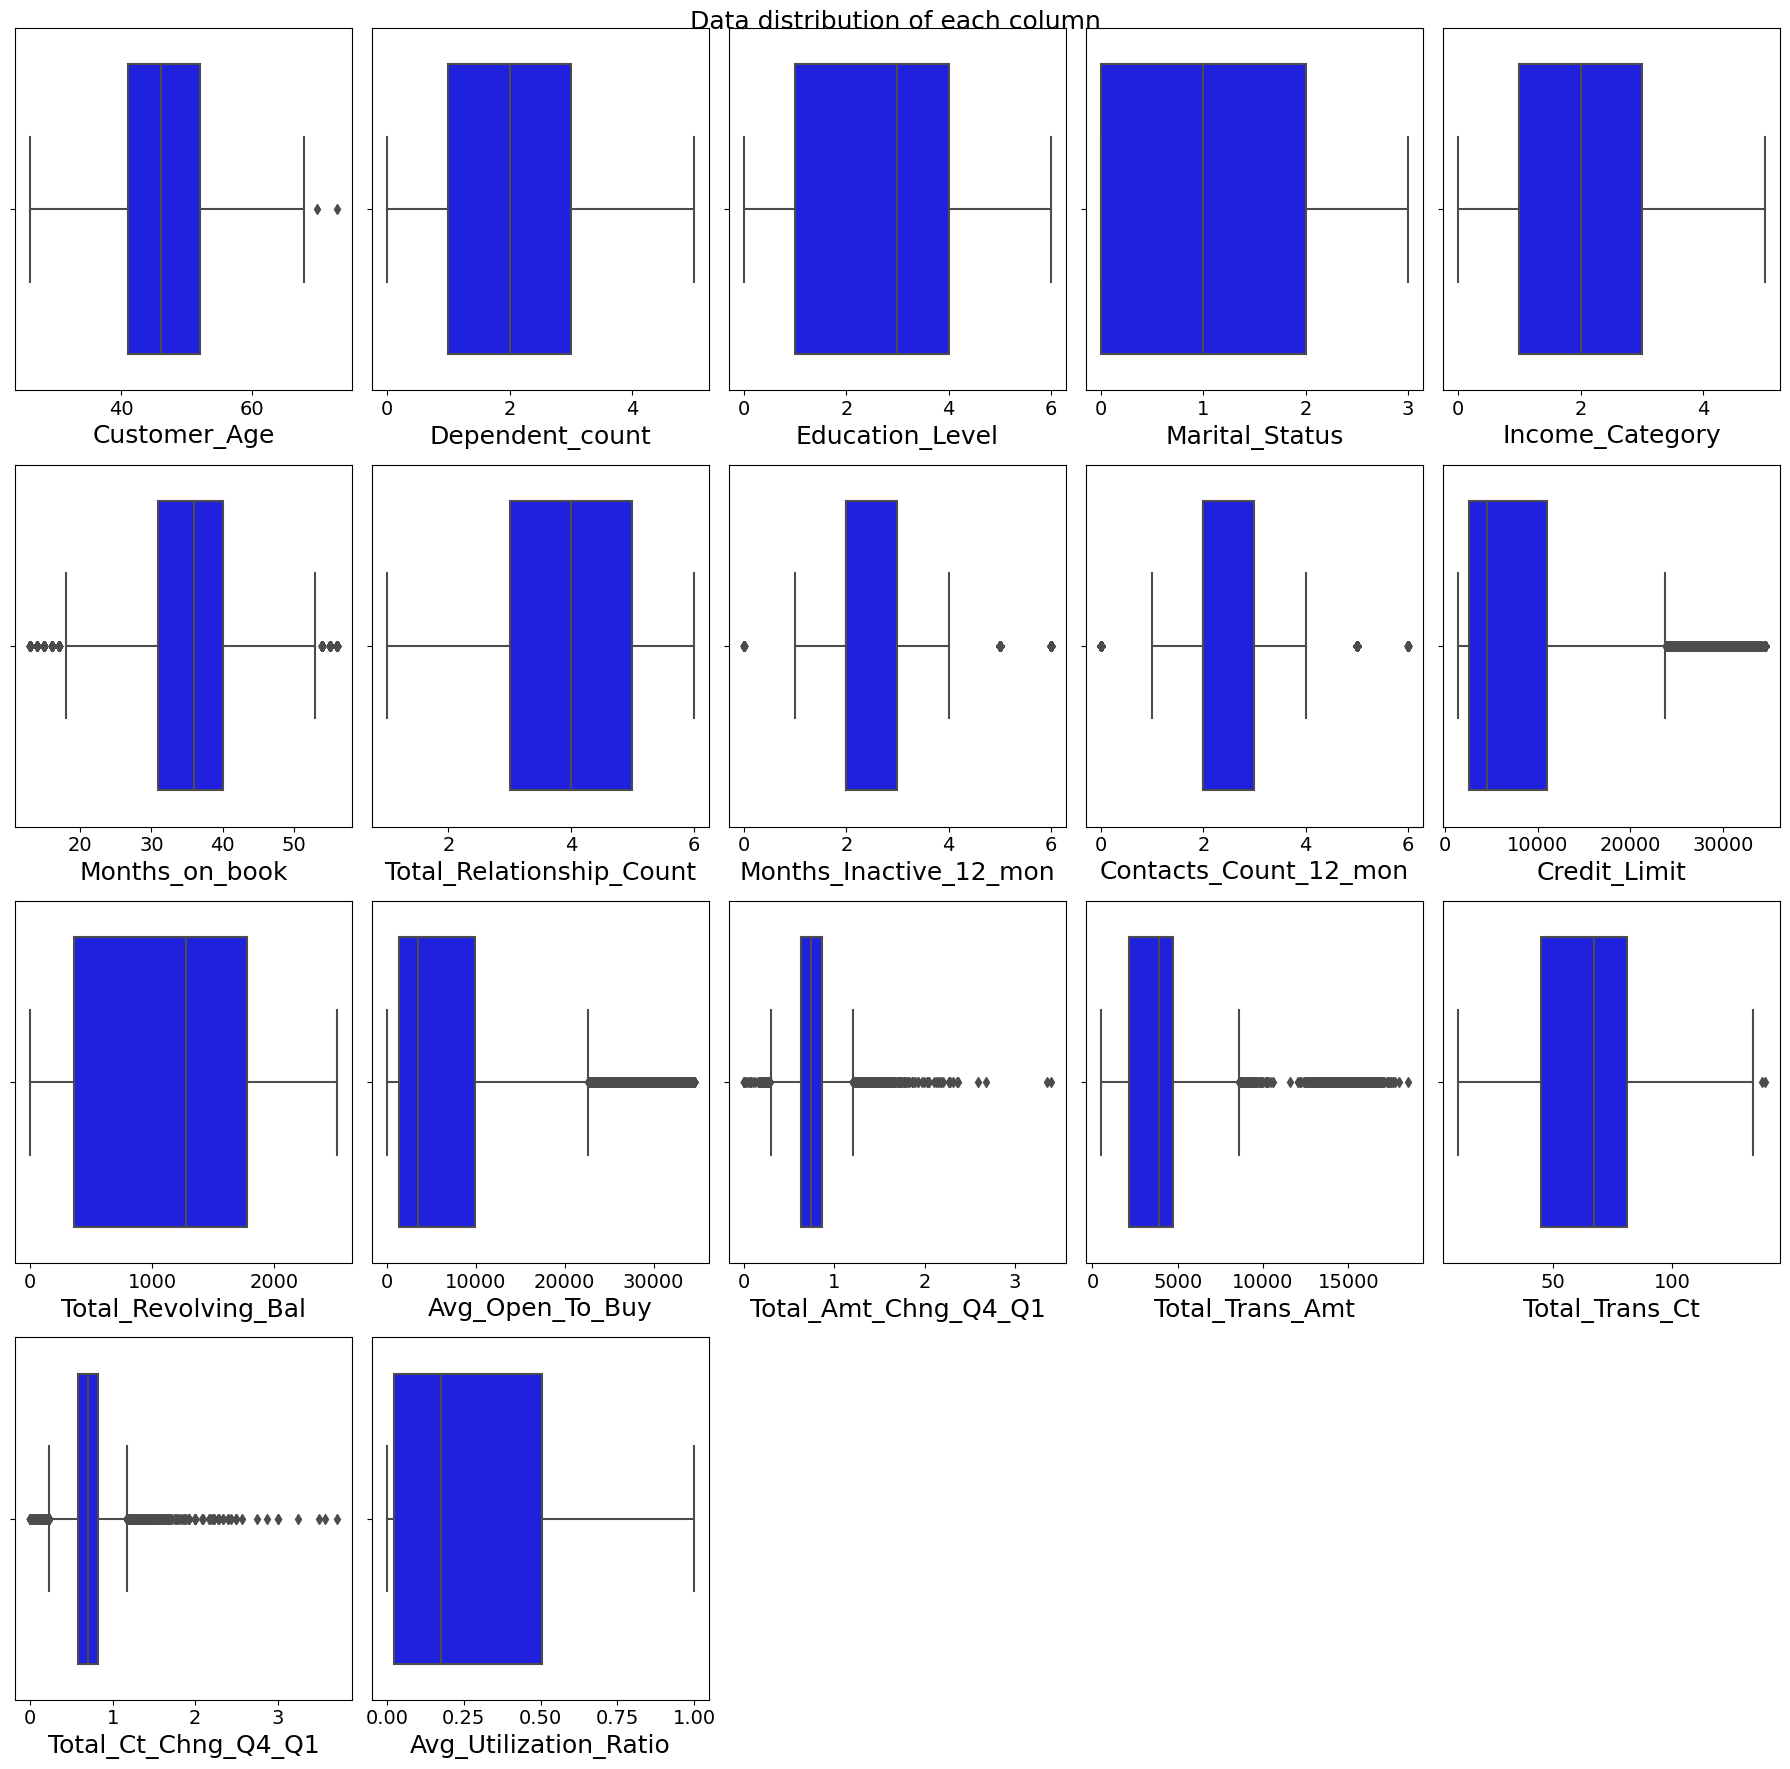

In [19]:
# Box Plot

plt.figure(figsize=(18, 18))
for i, col in enumerate(df.drop(['Attrition_Flag','Gender'], axis=1).select_dtypes(include=['int', 'float']).columns):
    plt.rcParams['axes.facecolor'] = 'white'
    ax = plt.subplot(4, 5, i+1)
    sns.boxplot(data=df, x=col, ax=ax, color='blue')
    ax.tick_params(axis='x', labelsize=14)
    ax.set_xlabel(col, fontsize=18)

plt.suptitle('Data distribution of each column',fontsize=18)
plt.tight_layout()

* Ensemble 시작

In [20]:
# 타겟변수와 독립변수 분리

X=df.drop(['Attrition_Flag'],axis=1)
y=df['Attrition_Flag']

In [21]:
X.head()
X.shape

(10127, 18)

In [22]:
# 가장 중요한 변수들만 선별하기

from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
from sklearn.feature_selection import RFE
import pandas as pd


# 랜덤시드 고정하기
np.random.seed(42)

# 다양한 앙상블 모델 정의해서 사용하기
available_models = {
    'ExtraTrees': ExtraTreesClassifier(n_estimators=100),
    'RandomForest': RandomForestClassifier(n_estimators=100),
    'SVM': SVC(kernel='linear'),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'LASSO': Lasso(alpha=0.01)
}

In [23]:
# ExtraTrees 사용하기

extra_trees = 'ExtraTrees'
clf = available_models[extra_trees]

# Fit을 이용하여 데이터 훈련시키기
clf = clf.fit(X.values, y)

# 변수중요도 추출하기
feature_importances = clf.feature_importances_

# 변수를 선정할 모델 생성
model = SelectFromModel(clf, prefit=True)

# 생성된 모델을 이용하여 변수 데이터 변환(=transform)
X_new = model.transform(X.values)


selected_feature_indices = model.get_support(indices=True)
selected_columns = X.columns[selected_feature_indices]


print("Selected columns:")
print(selected_columns)

Selected columns:
Index(['Total_Relationship_Count', 'Total_Revolving_Bal', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1'],
      dtype='object')


findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

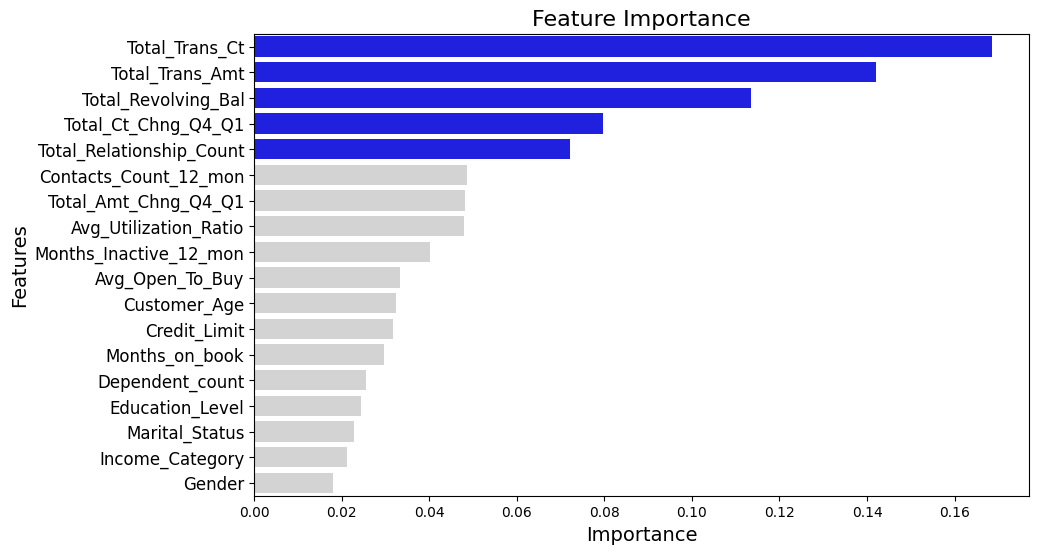

In [24]:
# 전체 변수중요도 시각화
sorted_indices = feature_importances.argsort()[::-1]
sorted_columns = X.columns[sorted_indices]
sorted_importances = feature_importances[sorted_indices]

plt.figure(figsize=(10, 6))

sns.barplot(x=sorted_importances, y=sorted_columns, palette=['lightgrey' if i not in selected_feature_indices else 'blue' for i in sorted_indices])

plt.xlabel("Importance", fontsize=14)
plt.ylabel("Features", fontsize=14)
plt.title("Feature Importance", fontsize=16)
plt.yticks(rotation=0, fontsize=12)
plt.show()

In [26]:
from sklearn.model_selection import train_test_split

# 훈련셋, 테스트셋으로 나누기
X_train,X_test,y_train,y_test=train_test_split(X_new,y,test_size=0.25,stratify=y,random_state=0)

In [27]:
print("Training X size: ", X_train.shape)
print("Training y size: ", y_train.shape)
print("Test X size: ", X_test.shape)
print("Test y size: ", y_test.shape)

Training X size:  (7595, 5)
Training y size:  (7595,)
Test X size:  (2532, 5)
Test y size:  (2532,)


findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

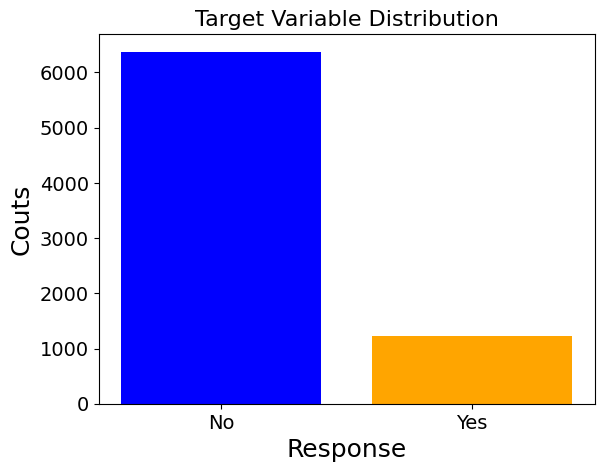

In [28]:
# 타겟변수가 비슷한 비율로 추출되지 않음

plt.bar(['No', 'Yes'], y_train.value_counts(), color=['blue', 'orange'])
plt.xlabel('Response', fontsize=18)
plt.ylabel('Couts', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Target Variable Distribution', fontsize=16)

plt.show()

* 타겟변수의 비율 차이가 크게 나므로, 비슷한 비율로 추출될 수 있게끔 SMOTE 이용

In [30]:
from imblearn.over_sampling import SMOTE
X_train,X_test,y_train,y_test=train_test_split(X_new,y,test_size=0.25,stratify=y,random_state=0)
sm = SMOTE(sampling_strategy='auto', random_state=42)
X_train,y_train=sm.fit_resample(X_train,y_train)

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

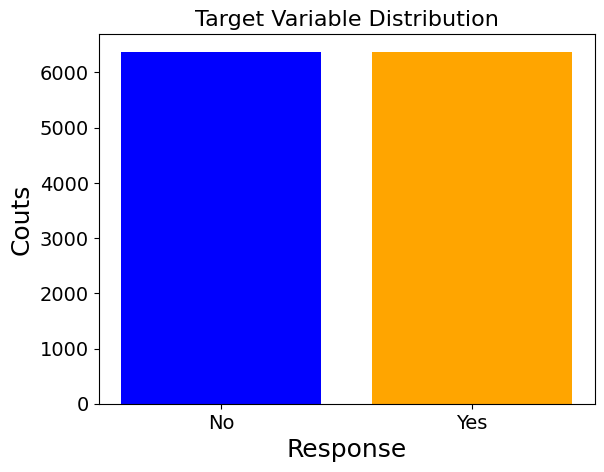

In [31]:
# 비슷한 비율로 추출됨을 확인

plt.bar(['No', 'Yes'], y_train.value_counts(), color=['blue', 'orange'])
plt.xlabel('Response', fontsize=18)
plt.ylabel('Couts', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Target Variable Distribution', fontsize=16)

plt.show()

In [32]:
# Normalization

from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [34]:
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# 앙상블을 진행할 다양한 모델 리스트화 하기

models = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier(criterion='entropy', random_state=0)),
    ('KNN', KNeighborsClassifier(n_neighbors=5)),
    ('Naive Bayes', GaussianNB()),
    ('Random Forest', RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)),
    ('Xg Boost', XGBClassifier())
]

model_comparison = {}  # 모델 성능 비교 method을 담을 딕셔너리 생성

for model_name, classifier in models:

    # 데이터 훈련 & 결과값 예측하기
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)

    # 모델 성능 평가
    accuracy = accuracy_score(y_pred, y_test)
    f1 = f1_score(y_pred, y_test, average='weighted')
    accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=5, scoring="recall")
    cv_accuracy = accuracies.mean()
    cv_std = accuracies.std()
    accuracy_class_0 = accuracy_score(y_pred[y_test == 0], y_test[y_test == 0])
    accuracy_class_1 = accuracy_score(y_pred[y_test == 1], y_test[y_test == 1])


    print(f"Model: {model_name}")
    print(f"Model Accuracy: {accuracy * 100:.2f}%")
    print(f"Model F1-Score: {f1 * 100:.2f}%")
    print(f"Cross Val Accuracy: {cv_accuracy * 100:.2f}%")
    print(f"Cross Val Standard Deviation: {cv_std * 100:.2f}%")


    model_comparison[model_name] = [accuracy, accuracy_class_0, accuracy_class_1, f1, cv_accuracy, cv_std]
    print(classification_report(y_pred, y_test, zero_division=1))
    print("-" * 60)

Model: Logistic Regression
Model Accuracy: 83.49%
Model F1-Score: 82.11%
Cross Val Accuracy: 84.86%
Cross Val Standard Deviation: 1.31%
              precision    recall  f1-score   support

           0       0.85      0.95      0.90      1885
           1       0.78      0.49      0.60       647

    accuracy                           0.83      2532
   macro avg       0.81      0.72      0.75      2532
weighted avg       0.83      0.83      0.82      2532

------------------------------------------------------------
Model: Decision Tree
Model Accuracy: 93.09%
Model F1-Score: 93.10%
Cross Val Accuracy: 94.10%
Cross Val Standard Deviation: 5.92%
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2128
           1       0.78      0.79      0.78       404

    accuracy                           0.93      2532
   macro avg       0.87      0.87      0.87      2532
weighted avg       0.93      0.93      0.93      2532

-------------------

In [35]:
# 앙상블 진행하기

from sklearn.ensemble import VotingClassifier

models = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier(criterion='entropy', random_state=0)),
    ('KNN', KNeighborsClassifier(n_neighbors=5)),
    ('Naive Bayes', GaussianNB()),
    ('Random Forest', RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)),
    ('Xg Boost', XGBClassifier())
]

voting_classifier = VotingClassifier(estimators=models, voting='soft')

voting_classifier.fit(X_train, y_train)

y_pred = voting_classifier.predict(X_test)

accuracy = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average='weighted')
accuracies = cross_val_score(estimator=voting_classifier, X=X_train, y=y_train, cv=5, scoring="recall")
cv_accuracy = accuracies.mean()
cv_std = accuracies.std()
accuracy_class_0 = accuracy_score(y_pred[y_test == 0], y_test[y_test == 0])
accuracy_class_1 = accuracy_score(y_pred[y_test == 1], y_test[y_test == 1])

print("Modelo: Voting Classifier")
print(f"Model Accuracy: {accuracy * 100:.2f}%")
print(f"Model F1-Score: {f1 * 100:.2f}%")
print(f"Cross Val Accuracy: {cv_accuracy * 100:.2f}%")
print(f"Cross Val Standard Deviation: {cv_std * 100:.2f}%")

model_comparison['Voting Classifier'] = [accuracy, accuracy_class_0, accuracy_class_1, f1, cv_accuracy, cv_std]
print(classification_report(y_pred, y_test, zero_division=1))
print("-" * 60)

Modelo: Voting Classifier
Model Accuracy: 94.91%
Model F1-Score: 94.86%
Cross Val Accuracy: 96.99%
Cross Val Standard Deviation: 3.99%
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2108
           1       0.86      0.83      0.84       424

    accuracy                           0.95      2532
   macro avg       0.91      0.90      0.91      2532
weighted avg       0.95      0.95      0.95      2532

------------------------------------------------------------


In [36]:
# 모델 성능 비교하기

for model_name, metrics in model_comparison.items():
    print(f"Modelo: {model_name}")
    print(f"Model Accuracy: {metrics[0] * 100:.2f}%")
    print(f"Model F1-Score: {metrics[3] * 100:.2f}%")
    print(f"Cross Val Accuracy: {metrics[4] * 100:.2f}%")
    print(f"Cross Val Standard Deviation: {metrics[5] * 100:.2f}%")
    print("-" * 60)

# 개별적인 모델과 성능 비교하기
voting_metrics = model_comparison['Voting Classifier']
for model_name in model_comparison:
    if model_name != 'Voting Classifier':
        individual_metrics = model_comparison[model_name]
        print(f"Comparando con {model_name}:")
        print(f"Mejora en Accuracy: {voting_metrics[0] - individual_metrics[0]:.2f}")
        print(f"Mejora en F1-Score: {voting_metrics[3] - individual_metrics[3]:.2f}")
        print("-" * 40)

Modelo: Logistic Regression
Model Accuracy: 83.49%
Model F1-Score: 82.11%
Cross Val Accuracy: 84.86%
Cross Val Standard Deviation: 1.31%
------------------------------------------------------------
Modelo: Decision Tree
Model Accuracy: 93.09%
Model F1-Score: 93.10%
Cross Val Accuracy: 94.10%
Cross Val Standard Deviation: 5.92%
------------------------------------------------------------
Modelo: KNN
Model Accuracy: 93.01%
Model F1-Score: 92.75%
Cross Val Accuracy: 95.95%
Cross Val Standard Deviation: 0.97%
------------------------------------------------------------
Modelo: Naive Bayes
Model Accuracy: 79.66%
Model F1-Score: 77.46%
Cross Val Accuracy: 83.15%
Cross Val Standard Deviation: 0.80%
------------------------------------------------------------
Modelo: Random Forest
Model Accuracy: 94.94%
Model F1-Score: 94.99%
Cross Val Accuracy: 96.22%
Cross Val Standard Deviation: 4.23%
------------------------------------------------------------
Modelo: Xg Boost
Model Accuracy: 95.42%
Model 

In [38]:
# 모델 성능 시각화

Model_com_df=pd.DataFrame(model_comparison).T
Model_com_df.columns=['Model Accuracy','Model Accuracy-0','Model Accuracy-1','Model F1-Score','CV Accuracy','CV std']
Model_com_df=Model_com_df.sort_values(by='Model F1-Score',ascending=False)
Model_com_df.style.format("{:.2%}").background_gradient(cmap='magma')

,Model Accuracy,Model Accuracy-0,Model Accuracy-1,Model F1-Score,CV Accuracy,CV std
Xg Boost,95.42%,97.69%,83.54%,95.46%,95.03%,9.12%
Random Forest,94.94%,97.36%,82.31%,94.99%,96.22%,4.23%
Voting Classifier,94.91%,96.56%,86.24%,94.86%,96.99%,3.99%
Decision Tree,93.09%,95.95%,78.13%,93.10%,94.10%,5.92%
KNN,93.01%,93.84%,88.70%,92.75%,95.95%,0.97%
Logistic Regression,83.49%,84.52%,78.13%,82.11%,84.86%,1.31%
Naive Bayes,79.66%,79.25%,81.82%,77.46%,83.15%,0.80%
